In [2]:
import pandas as pd
import numpy as np
import cython
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.datasets import make_classification
from CalculateMetrics import calculate_all_metrics
import matplotlib.pyplot as plt

data = make_classification(n_samples=10000, n_features=20, n_informative=16, n_redundant=4, random_state=42, n_classes=2)
X, y = data
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
y = pd.Series(y, name='target')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
def run_test(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.array(y_pred)
    if y_pred.ndim > 1:
        y_pred = np.array([np.argmax(pred) for pred in y_pred])
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(name)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report - Test:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    labels = ['Class 0', 'Class 1']
    print("Confusion Matrix:")
    print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
    print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
    print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

XGBoost Classifier
Accuracy: 0.9388
ROC AUC: 0.9840
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1259
           1       0.95      0.93      0.94      1241

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500

Confusion Matrix:
                    Class 0             Class 1             
Class 0             1195                64                    # True Negative (TN), False Positive (FP)
Class 1             89                  1152                  # False Negative (FN), True Positive (TP)


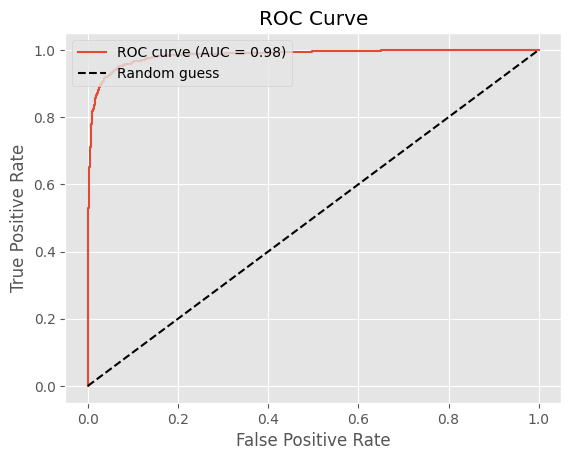

In [20]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
run_test(xgb, "XGBoost Classifier", X_train, y_train, X_test, y_test)

Ender Classifier Bounded Fast
Accuracy: 0.7724
ROC AUC: 0.8621
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1259
           1       0.78      0.75      0.77      1241

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500

Confusion Matrix:
                    Class 0             Class 1             
Class 0             1003                256                   # True Negative (TN), False Positive (FP)
Class 1             313                 928                   # False Negative (FN), True Positive (TP)


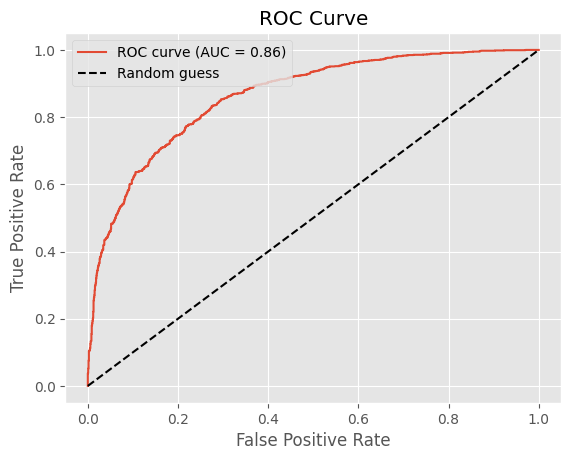

In [ ]:
from EnderClassifierBoundedFast import EnderClassifier as ECBF

ecbf = ECBF(verbose=False, n_rules=25, use_gradient=False)
run_test(ecbf, "Ender Classifier Bounded Fast", X_train, y_train, X_test, y_test)
#2.6s

Ender Classifier Bounded Fast with Gradient
Accuracy: 0.7660
ROC AUC: 0.8479
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1259
           1       0.77      0.75      0.76      1241

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500

Confusion Matrix:
                    Class 0             Class 1             
Class 0             980                 279                   # True Negative (TN), False Positive (FP)
Class 1             306                 935                   # False Negative (FN), True Positive (TP)


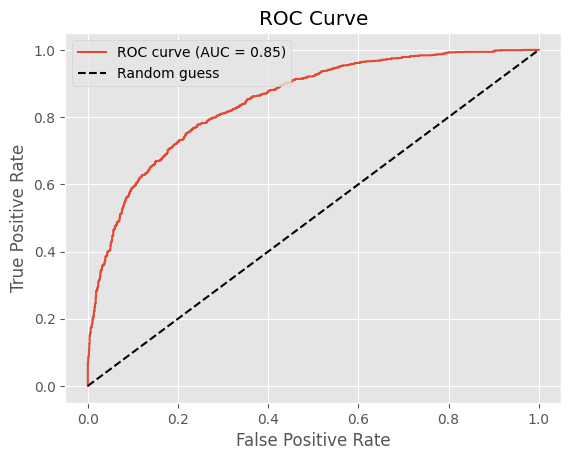

In [ ]:
ecbf = ECBF(verbose=False, n_rules=25, use_gradient=True)
run_test(ecbf, "Ender Classifier Bounded Fast with Gradient", X_train, y_train, X_test, y_test)
# Takes 6.4s, use_gradient=False takes 2.6s

Ender Classifier Modified
Accuracy: 0.8388
ROC AUC: 0.9232
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1259
           1       0.81      0.88      0.84      1241

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500

Confusion Matrix:
                    Class 0             Class 1             
Class 0             1001                258                   # True Negative (TN), False Positive (FP)
Class 1             145                 1096                  # False Negative (FN), True Positive (TP)


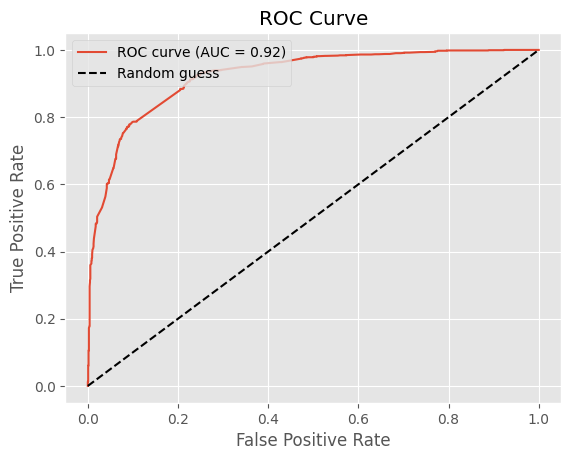

In [ ]:
from EnderClassifierModified import EnderClassifier as ECM

ecm = ECM(verbose=False, n_rules=25, use_gradient=False)
run_test(ecm, "Ender Classifier Modified", X_train, y_train, X_test, y_test)
# 1.2s

Ender Classifier Modified with Gradient
Accuracy: 0.8496
ROC AUC: 0.9241
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1259
           1       0.84      0.87      0.85      1241

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500

Confusion Matrix:
                    Class 0             Class 1             
Class 0             1048                211                   # True Negative (TN), False Positive (FP)
Class 1             165                 1076                  # False Negative (FN), True Positive (TP)


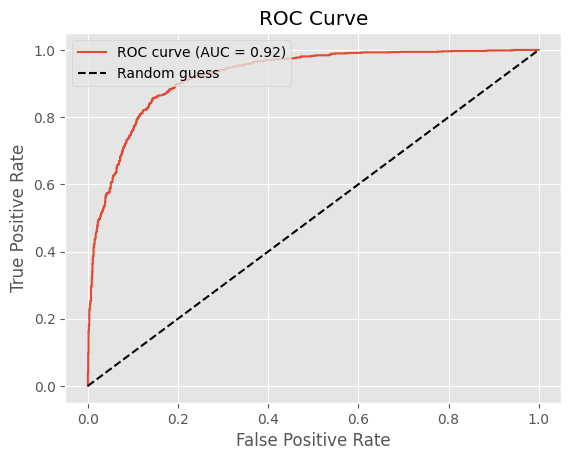

In [19]:
emc = ECM(verbose=False, n_rules=25, use_gradient=True)
run_test(emc, "Ender Classifier Modified with Gradient", X_train, y_train, X_test, y_test)
# 2.3s, use_gradient=False takes 1.2s

In [ ]:
from EnderClassifierBoundedFast import EnderClassifier

print("ENDER CLASSIFIER NORMAL")
ender = EnderClassifier(verbose=True, n_rules=5, use_gradient=False)
ender.fit(X_train, y_train, X_test=X_test, y_test=y_test)

ENDER CLASSIFIER NORMAL
Default rule: [-0.00263148  0.00263148]
####################################################################################
Rule: 1
Default Rule: MSE = 0.24999822253194118
Squared errors calculated in 0.0010 seconds
Lower bound computed in 0.0020 seconds, value: 0.1734596494747495
Lower bound computed in 0.0020 seconds, value: 0.14281938578330164
Lower bound computed in 0.0010 seconds, value: 0.11485678338058279
Lower bound computed in 0.0010 seconds, value: 0.08846302734337876
Lower bound computed in 0.0010 seconds, value: 0.07419624294623918
Lower bound computed in 0.0010 seconds, value: 0.06733413682239865
Lower bound computed in 0.0010 seconds, value: 0.06718097939488371
Lower bound computed in 0.0020 seconds, value: 0.06453516185882094
Lower bound computed in 0.0020 seconds, value: 0.05712702413319711
Lower bound computed in 0.0010 seconds, value: 0.054349010135450244
Lower bound computed in 0.0010 seconds, value: 0.054709841765674366
Lower bound computed 

In [3]:
from EnderClassifierBounded import EnderClassifier

print("ENDER CLASSIFIER NORMAL")
ender = EnderClassifier(verbose=True, n_rules=5, use_gradient=False)
ender.fit(X_train, y_train, X_test=X_test, y_test=y_test)

ENDER CLASSIFIER NORMAL
Initializing for rule...
Default rule: [-0.002631475073352435, 0.002631475073352435]
####################################################################################
Rule: 1
Default Rule: MSE = 0.24999822253194118
Squared errors calculated in 0.0000 seconds
Initializing for rule...
Lower bound computed in 0.2738 seconds, value: 0.17345964947474954
Lower bound computed in 0.2046 seconds, value: 0.14281938578330164
Lower bound computed in 0.1460 seconds, value: 0.11485678338058275
Lower bound computed in 0.1179 seconds, value: 0.08846302734337871
Lower bound computed in 0.1040 seconds, value: 0.07419624294623918
Lower bound computed in 0.0989 seconds, value: 0.06733413682239862
Lower bound computed in 0.0985 seconds, value: 0.06718097939488371
Lower bound computed in 0.0973 seconds, value: 0.06453516185882094
Lower bound computed in 0.0908 seconds, value: 0.05712702413319711
Lower bound computed in 0.0887 seconds, value: 0.054349010135450244
Lower bound comput

KeyboardInterrupt: 

In [13]:
ender.evaluate_all_rules()

100%|██████████| 5/5 [00:00<00:00, 5017.11it/s]


In [14]:
ender.history['accuracy']

[0.5013333333333333,
 0.5013333333333333,
 0.6653333333333333,
 0.6653333333333333,
 0.7366666666666667,
 0.806]

In [15]:
y_preds = ender.predict(X_test)
y_preds[:5]

1 / (1 + np.exp(-np.array(y_preds[:5])))

array([[0.70648151, 0.29351849],
       [0.70648151, 0.29351849],
       [0.49934213, 0.50065787],
       [0.49934213, 0.50065787],
       [0.32623155, 0.67376845]])

In [16]:
y_proba = ender.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, y_proba[:, 1]))

ROC AUC: 0.8645338325413205


In [3]:
y_train_pred = ender.predict(X_train)
y_test_pred = ender.predict(X_test)

train_metrics = calculate_all_metrics(y_train, y_train_pred)
test_metrics = calculate_all_metrics(y_test, y_test_pred)

y_pred = np.array([np.argmax(pred) for pred in y_test_pred])

print("Normal Ender Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("Classification Report - Test:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
labels = ['No Endometriosis', 'Endometriosis']
print("Confusion Matrix:")
print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")

Normal Ender Classifier
Accuracy: 0.83

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.95      0.70      0.81       251
           1       0.76      0.96      0.85       249

    accuracy                           0.83       500
   macro avg       0.85      0.83      0.83       500
weighted avg       0.85      0.83      0.83       500

[[176  75]
 [ 10 239]]
Confusion Matrix:
                    No Endometriosis    Endometriosis       
No Endometriosis    176                 75                    # True Negative (TN), False Positive (FP)
Endometriosis       10                  239                   # False Negative (FN), True Positive (TP)


In [4]:
from EnderClassifierBounded import EnderClassifier

print("ENDER CLASSIFIER BOUNDED")
ender = EnderClassifier(verbose=True, n_rules=10, use_gradient=False)
ender.fit(X_train, y_train)

ENDER CLASSIFIER BOUNDED
Initializing for rule...
Default rule: [-0.002631475073352435, 0.002631475073352435]
####################################################################################
Rule: 1
Initializing for rule...
	feature_5 in [-99999999999999999, -0.9443909709545464]
	feature_12 in [-2.271701947764483, 99999999999999999]
	feature_4 in [-1.4551773500347207, 99999999999999999]
	feature_7 in [-2.0000636212235694, 99999999999999999]
	feature_1 in [-99999999999999999, 3.712704240888133]
	feature_15 in [-5.470747500423569, 99999999999999999]
	feature_3 in [-6.104817554735214, 99999999999999999]
	feature_8 in [-5.875450595774485, 99999999999999999]
	feature_13 in [-5.733276408417242, 99999999999999999]
	feature_6 in [-5.22759951659163, 5.608646363385912]
	feature_14 in [-99999999999999999, 8.234758160144398]
=> vote for class 1 with weight 0.8163421204134435
[-0.8163421204134435, 0.8163421204134435]

#############################################################################

In [5]:
y_train_pred = ender.predict(X_train)
y_test_pred = ender.predict(X_test)

train_metrics = calculate_all_metrics(y_train, y_train_pred)
test_metrics = calculate_all_metrics(y_test, y_test_pred)

y_pred = np.array([np.argmax(pred) for pred in y_test_pred])

print("Bounded Ender Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("Classification Report - Test:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['No Endometriosis', 'Endometriosis']
print("Confusion Matrix:")
print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")

Bounded Ender Classifier
Accuracy: 0.79

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       251
           1       0.76      0.84      0.80       249

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500

Confusion Matrix:
                    No Endometriosis    Endometriosis       
No Endometriosis    183                 68                    # True Negative (TN), False Positive (FP)
Endometriosis       39                  210                   # False Negative (FN), True Positive (TP)


In [1]:
from CalculateMetrics import calculate_all_metrics
from EnderClassifierModified import EnderClassifier

print("EnderClassifierModified")
enderM = EnderClassifier(verbose=False, n_rules=20, use_gradient=False)
enderM.fit(X_train, y_train)

EnderClassifierModified


NameError: name 'X_train' is not defined

In [ ]:
y_train_pred = enderM.predict(X_train)
y_test_pred = enderM.predict(X_test)

train_metrics = calculate_all_metrics(y_train, y_train_pred)
test_metrics = calculate_all_metrics(y_test, y_test_pred)

y_pred = np.array([np.argmax(pred) for pred in y_test_pred])

print("Modified Ender Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("Classification Report - Test:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['No Endometriosis', 'Endometriosis']
print("Confusion Matrix:")
print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")

Modified Ender Classifier
Accuracy: 0.81

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       150
           1       0.64      0.52      0.57        48

    accuracy                           0.81       198
   macro avg       0.75      0.71      0.73       198
weighted avg       0.80      0.81      0.81       198

Confusion Matrix:
                    No Endometriosis    Endometriosis       
No Endometriosis    136                 14                    # True Negative (TN), False Positive (FP)
Endometriosis       23                  25                    # False Negative (FN), True Positive (TP)


In [ ]:
for n in range(15, 45):
    ender = EnderClassifier(verbose=False, n_rules=n, use_gradient=False)
    ender.fit(X_train, y_train)
    y_train_pred = ender.predict(X_train)
    y_train_pred = np.array([np.argmax(pred) for pred in y_train_pred])
    y_test_pred = ender.predict(X_test)
    y_pred = np.array([np.argmax(pred) for pred in y_test_pred])
    print(f"EnderClassifier with {n} rules")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
    print("================================")

EnderClassifier with 15 rules
Test Accuracy: 0.82
Train Accuracy: 0.94
EnderClassifier with 16 rules
Test Accuracy: 0.82
Train Accuracy: 0.94
EnderClassifier with 17 rules
Test Accuracy: 0.83
Train Accuracy: 0.95
EnderClassifier with 18 rules
Test Accuracy: 0.83
Train Accuracy: 0.95
EnderClassifier with 19 rules
Test Accuracy: 0.83
Train Accuracy: 0.96
EnderClassifier with 20 rules
Test Accuracy: 0.83
Train Accuracy: 0.96
EnderClassifier with 21 rules
Test Accuracy: 0.83
Train Accuracy: 0.96
EnderClassifier with 22 rules
Test Accuracy: 0.83
Train Accuracy: 0.97
EnderClassifier with 23 rules
Test Accuracy: 0.83
Train Accuracy: 0.97
EnderClassifier with 24 rules
Test Accuracy: 0.83
Train Accuracy: 0.97
EnderClassifier with 25 rules
Test Accuracy: 0.82
Train Accuracy: 0.97
EnderClassifier with 26 rules
Test Accuracy: 0.83
Train Accuracy: 0.97
EnderClassifier with 27 rules
Test Accuracy: 0.83
Train Accuracy: 0.97
EnderClassifier with 28 rules
Test Accuracy: 0.83
Train Accuracy: 0.98
EnderC

In [ ]:
from time import time
ender = EnderClassifier(verbose=False, n_rules=41, use_gradient=False)
start_time = time()
ender.fit(X_train, y_train)
# y_train_pred = ender.predict(X_train)
# y_train_pred = np.array([np.argmax(pred) for pred in y_train_pred])
y_test_pred = ender.predict(X_test)
y_pred = np.array([np.argmax(pred) for pred in y_test_pred])
print(f"Training time for 14 rules: {time() - start_time:.2f} seconds")

print("Modified Ender Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("Classification Report - Test:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = ['No Endometriosis', 'Endometriosis']
print("Confusion Matrix:")
print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")

Training time for 14 rules: 0.51 seconds
Modified Ender Classifier
Accuracy: 0.84

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       151
           1       0.75      0.50      0.60        48

    accuracy                           0.84       199
   macro avg       0.80      0.72      0.75       199
weighted avg       0.83      0.84      0.83       199

Confusion Matrix:
                    No Endometriosis    Endometriosis       
No Endometriosis    143                 8                     # True Negative (TN), False Positive (FP)
Endometriosis       24                  24                    # False Negative (FN), True Positive (TP)


In [ ]:
# from EnderRegressor import EnderRegressor
# from CalculateMetrics import calculate_all_metrics

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# df = pd.read_csv("/home/maciej/Desktop/Maciej/endometriosis/endometriosis.csv")
# X = df.drop(columns=['target'])
# y = df['target'].astype('int')
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ender = EnderRegressor(verbose=False)
# ender.fit(X_train, y_train)

In [ ]:
# ender.evaluate_all_rules()
# ender.rules

In [ ]:
# y_train_pred = ender.predict(X_train)
# y_test_pred = ender.predict(X_test)

# train_metrics = calculate_all_metrics(y_train, y_train_pred)
# test_metrics = calculate_all_metrics(y_test, y_test_pred)

In [ ]:
# y_pred = np.array([np.argmax(pred) for pred in y_test_pred])

# print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
# print("Classification Report - Test:")
# print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)
# labels = ['No Endometriosis', 'Endometriosis']
# print("Confusion Matrix:")
# print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
# print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
# print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")

In [ ]:
# from EnderClassifier import EnderClassifier as ECOG

In [ ]:
# ender2 = ECOG(verbose=False)
# ender2.fit(X_train, y_train)

In [ ]:
# ender2.evaluate_all_rules()

In [ ]:
# ender = ender2

In [ ]:
# y_train_pred = ender.predict(X_train)
# y_test_pred = ender.predict(X_test)
# train_metrics = calculate_all_metrics(y_train, y_train_pred)
# test_metrics = calculate_all_metrics(y_test, y_test_pred)

In [ ]:
# y_pred = np.array([np.argmax(pred) for pred in y_test_pred])

# print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
# print("Classification Report - Test:")
# print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)
# labels = ['No Endometriosis', 'Endometriosis']
# print("Confusion Matrix:")
# print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
# print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
# print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")